# TITANIC DATASET
In this work, i will carry out analysis on the titanic dataset and build models after carefully analyzing the dataset. 
the following packages will be used to build my model
1. KNN
2. DECISION TREE
3. RANDOM FOREST
4. LOGISTIC REGRESSION

The Titanic dataset provides information about the passengers on the Titanic ship during its maiden voyage in 1912. The features in the dataset include Passenger Class, Name, Gender, Age, Number of Siblings/Spouses Aboard, Number of Parents/Children Aboard, Ticket Number, Fare, Cabin Number, and Port of Embarkation. The target variable is whether a passenger survived or not. The dataset can be used to gain insights about the survival rates based on various demographic and socioeconomic factors, and can also be used for building machine learning models for survival prediction.

The Titanic dataset typically includes the following columns:

PassengerId: unique identifier for each passenger
Survived: target variable indicating if a passenger survived (1) or did not survive (0)
Pclass: ticket class, with 1 being first class, 2 being second class, and 3 being third class
Name: name of passenger
Sex: gender of passenger
Age: age of passenger in years
SibSp: number of siblings/spouses onboard the Titanic
Parch: number of parents/children onboard the Titanic
Ticket: ticket number
Fare: fare paid for the ticket
Cabin: cabin number
Embarked: port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('titanic-passengers.csv', sep=';')

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [47]:
data.shape

(891, 12)

In [48]:
data.drop('Cabin', axis =1, inplace= True)

In [49]:
data['Age'].interpolate(method='linear', inplace=True)

In [50]:
data['Embarked'].fillna('S', inplace=True)

In [51]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,24.5,0,0,349215,7.8958,S


In [64]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 62.8+ KB


In [66]:
data['Age'] = data['Age'].astype('int')

In [67]:
# Label enconder

from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() #create an object of the Label Encoder class



In [68]:
data['Survived'] = encoder.fit_transform(data['Survived'])
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [69]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,24,0,0,349215,7.8958,2


# 1. LOGISTIC

In [70]:
# feature extraction or engineering

x = data[['Pclass', 'Sex', 'Age','Embarked', 'Parch', 'SibSp']]
y = data['Survived'].values



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=20)

model.fit(x_train, y_train)


LogisticRegression()

In [71]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [72]:
model.score(x_test,y_test)

0.8435754189944135

In [73]:
print(f'Accuracy = {model.score(x_train, y_train)}')

Accuracy = 0.7879213483146067


In [74]:
print(f'Accuracy = {model.score(x_test, y_test)}')

Accuracy = 0.8435754189944135


In [75]:
model.score(x_train, y_train)

0.7879213483146067

# 2. CONFUSION MATRIX

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

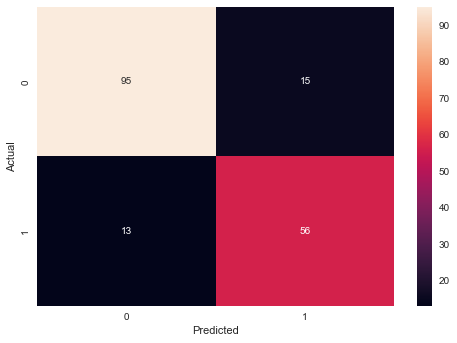

In [76]:
# confusion matrix: this gives a matrix for the predicted and actual
import seaborn as sb
y_pred = model.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames= ['Actual'], colnames = ['Predicted'])
sb.heatmap(confusion_matrix, annot=True)

# 3. ROC&AUC

In [77]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
fpr, tpr, _= roc_curve(y_test, random_probs, pos_label=1)
print(fpr, tpr, _)

[0. 1.] [0. 1.] [1 0]


In [78]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)


0.8376152832674573


In [79]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

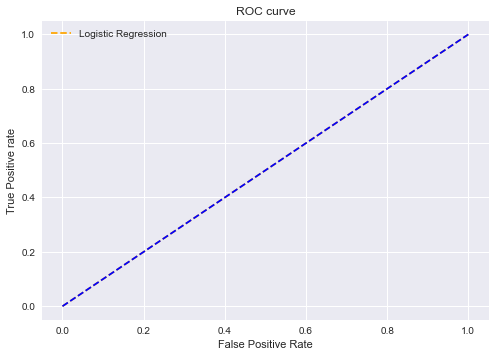

In [80]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

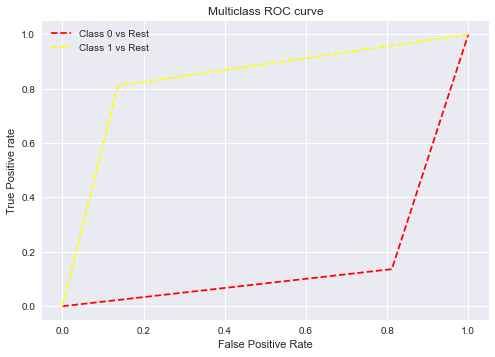

In [81]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


# KNN

In [82]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,24,0,0,349215,7.8958,2


In [83]:
# feature extraction or engineering

x = data[['Pclass', 'Sex', 'Age','Embarked', 'Parch', 'SibSp']]
y = data['Survived'].values



In [133]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


model = KNeighborsClassifier(7)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=20)

model.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=7)

In [134]:
 y_pred = model.predict(x_test)

In [135]:
print(f'The accuracy of the model is {accuracy_score(y_pred, y_test)}')

The accuracy of the model is 0.7089552238805971


In [136]:
print(f'The accuracy of the model is {accuracy_score(model.predict(x_train), y_train)}')

The accuracy of the model is 0.7961476725521669


# 2. Optimal Number of K

In [88]:
scores = []
for k in range(1,20):
  model = KNeighborsClassifier(k)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(f'{k} : {accuracy_score(y_pred,y_test)}')
  scores.append(accuracy_score(y_pred, y_test))


# k = 7 is the optimal k because that is the best score k can get. 
# 

1 : 0.6977611940298507
2 : 0.7052238805970149
3 : 0.6902985074626866
4 : 0.6753731343283582
5 : 0.7014925373134329
6 : 0.7052238805970149
7 : 0.7089552238805971
8 : 0.7014925373134329
9 : 0.7052238805970149
10 : 0.6940298507462687
11 : 0.7089552238805971
12 : 0.6977611940298507
13 : 0.6977611940298507
14 : 0.6828358208955224
15 : 0.667910447761194
16 : 0.6716417910447762
17 : 0.664179104477612
18 : 0.6567164179104478
19 : 0.664179104477612


# Decision Tree

In [89]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [94]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [95]:
#applying tree algorithm
model = tree.DecisionTreeClassifier()  

model.fit(x_train, y_train)   #fitting our model

y_pred=model.predict(x_test)   # evaluating our model


print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


In [96]:
accuracy_score(model.predict(x_train), y_train)

0.9424157303370787

In [138]:
# accuracy_score(model.predict(x_test), y_test)

In [70]:
conda install graphviz


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Kingsley\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-23.1.0               |   py39haa95532_0         946 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b12b_6 

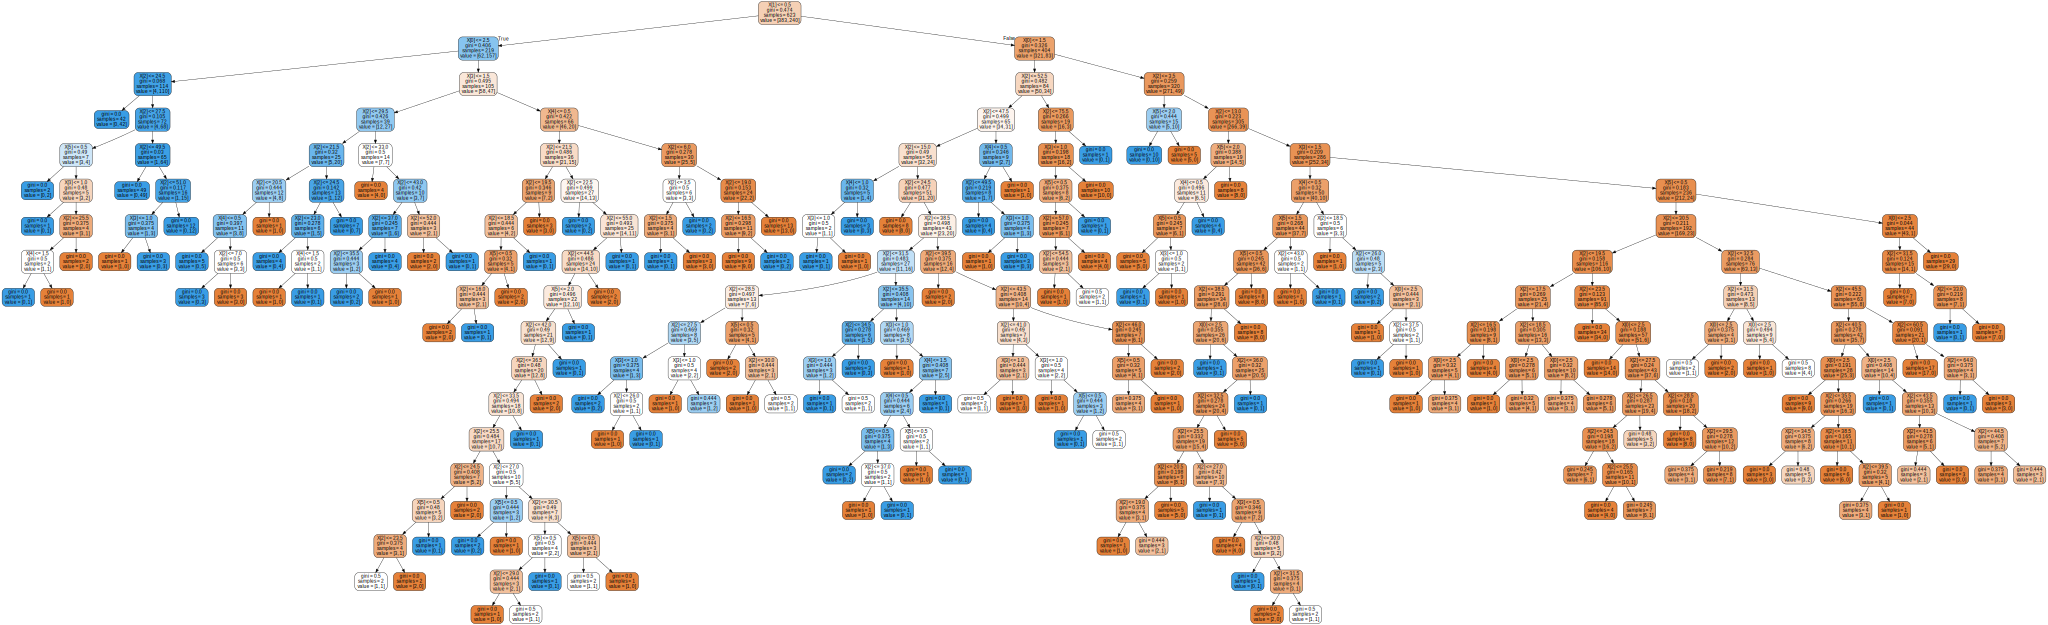

In [93]:
import graphviz
graph_ = tree.export_graphviz(model,label='all', rounded=True, filled=True)
graph = graphviz.Source(graph_)

graph.render('data')
graph

# Changing the Parameters

In [98]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=20)

In [99]:
#applying tree algorithm
model = tree.DecisionTreeClassifier()  

model.fit(x_train, y_train)   #fitting our model

y_pred=model.predict(x_test)   # evaluating our model


print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7757847533632287


In [100]:
accuracy_score(model.predict(x_train), y_train)

0.9446107784431138

In [101]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=15)

In [102]:
#applying tree algorithm
model = tree.DecisionTreeClassifier()  

model.fit(x_train, y_train)   #fitting our model

y_pred=model.predict(x_test)   # evaluating our model


print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7425373134328358


# Summary

After making few changes to the parameter, i discovered that the fewer data given to the model as train data, the less accurate the result becomes.

to this regard, i would recommend enough data is given to the model as train data so as to learn from.

# Random Forest

In [103]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)


model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [104]:
y_pred=model.predict(x_train)

print(f'The accuracy for the train data {metrics.accuracy_score(y_train,y_train)}')

The accuracy for the train data 1.0


In [105]:
y_pred=model.predict(x_test)   # evaluating our model


print(f'The accuracy for the test data {metrics.accuracy_score(y_pred,y_test)}')

The accuracy for the test data 0.7932960893854749


In [106]:
# FEATURE ENGINEERING IS VERY IMPORTANT.

from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(model,x,y, cv=5)

print(f'Accuracy on each fold: {scores}')
print(f'Accuracy on each accuracy: {sum(scores)/5}')

Accuracy on each fold: [0.73743017 0.83707865 0.7752809  0.7752809  0.7247191 ]
Accuracy on each accuracy: 0.7699579436319126


# Changing the Parameter

In [125]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)


model = RandomForestClassifier(n_estimators=3)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=3)

In [126]:
y_pred=model.predict(x_train)

print(f'The accuracy for the train data {metrics.accuracy_score(y_train,y_train)}')

The accuracy for the train data 1.0


In [127]:
y_pred=model.predict(x_test)   # evaluating our model


print(f'The accuracy for the test data {metrics.accuracy_score(y_pred,y_test)}')

The accuracy for the test data 0.776536312849162


In [128]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)


model = RandomForestClassifier(n_estimators=4)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=4)

In [129]:
y_pred=model.predict(x_train)

print(f'The accuracy for the train data {metrics.accuracy_score(y_train,y_train)}')

The accuracy for the train data 1.0


In [130]:
y_pred=model.predict(x_test)   # evaluating our model


print(f'The accuracy for the test data {metrics.accuracy_score(y_pred,y_test)}')

The accuracy for the test data 0.8268156424581006


# Summary
n_estimators refers to the number of decision trees that are used in the forest. In other words, it is the number of individual trees that are combined to form the random forest. Increasing the number of estimators will increase the overall accuracy of the model, but will also increase the computational cost. 

With this being said, leaving the n_estimators as 4is the best practice because it will reduce cost and also it gives a better accuracy compared to others

# Plotting of Accuracy for different packages

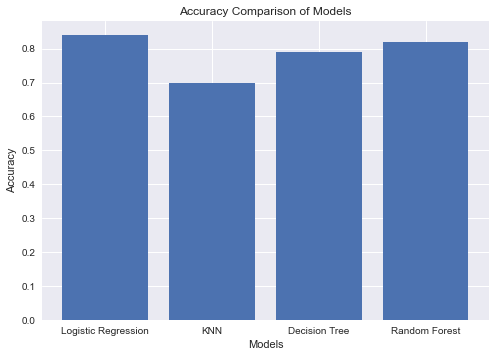

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.84, 0.70, 0.79, 0.82]

# Plot the bar graph
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, align='center')
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy Comparison of Models')
plt.show()


in this case, we can see that Logistic Regression performs slightly better than random forest which is immediately followed by decision tree and knn performs as the least amongst the 4.